In [ ]:
# Importing Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 

In [ ]:
#Load the data set
bank = pd.read_csv("/content/bank-full.csv.crdownload",sep = ";",engine='python', error_bad_lines=False)

<ipython-input-2-669005284ba6>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  bank = pd.read_csv("/content/bank-full.csv.crdownload",sep = ";",engine='python', error_bad_lines=False)
Skipping line 20633: unexpected end of data


In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,54,blue-collar,married,primary,no,1173,no,no,telephone,12,aug,128,8,-1,0,unknown,no
20627,31,technician,single,tertiary,no,208,no,no,cellular,12,aug,1344,7,-1,0,unknown,yes
20628,31,management,divorced,tertiary,no,297,no,no,cellular,12,aug,127,1,-1,0,unknown,no
20629,46,management,single,tertiary,no,2278,no,no,cellular,12,aug,218,5,-1,0,unknown,no


In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA preocess

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        20631 non-null  int64 
 1   job        20631 non-null  object
 2   marital    20631 non-null  object
 3   education  20631 non-null  object
 4   default    20631 non-null  object
 5   balance    20631 non-null  int64 
 6   housing    20631 non-null  object
 7   loan       20631 non-null  object
 8   contact    20631 non-null  object
 9   day        20631 non-null  int64 
 10  month      20631 non-null  object
 11  duration   20631 non-null  int64 
 12  campaign   20631 non-null  int64 
 13  pdays      20631 non-null  int64 
 14  previous   20631 non-null  int64 
 15  poutcome   20631 non-null  object
 16  y          20631 non-null  object
dtypes: int64(7), object(10)
memory usage: 2.7+ MB


In [ ]:
bank.shape

(20631, 17)

In [ ]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.0
mean,40.984586,1121.303524,15.995298,258.620280,3.086957,-1.0,0.0
std,9.551922,2627.864435,8.606665,260.588616,3.666291,0.0,0.0
min,20.000000,-8019.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,33.000000,29.000000,8.000000,103.000000,1.000000,-1.0,0.0
50%,40.000000,349.000000,16.000000,178.000000,2.000000,-1.0,0.0
75%,49.000000,1186.500000,23.000000,316.000000,3.000000,-1.0,0.0
max,61.000000,66721.000000,31.000000,3881.000000,63.000000,-1.0,0.0


In [ ]:
bank[bank.duplicated()].shape

(0, 17)

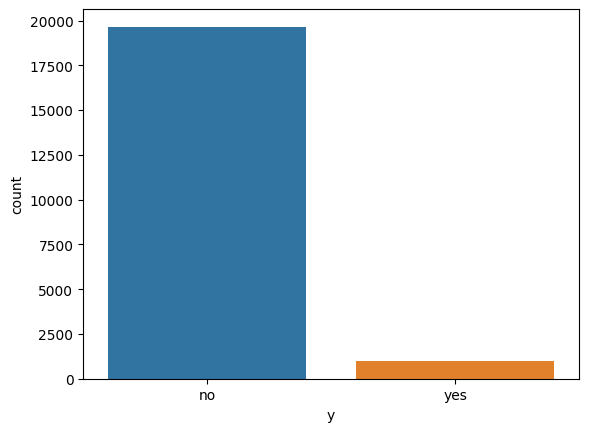

In [ ]:
sns.countplot(x="y",data = bank)
plt.show()

In [ ]:
d1 = bank[bank["y"]=="yes"]
d2 = bank[bank["y"]=="no"]

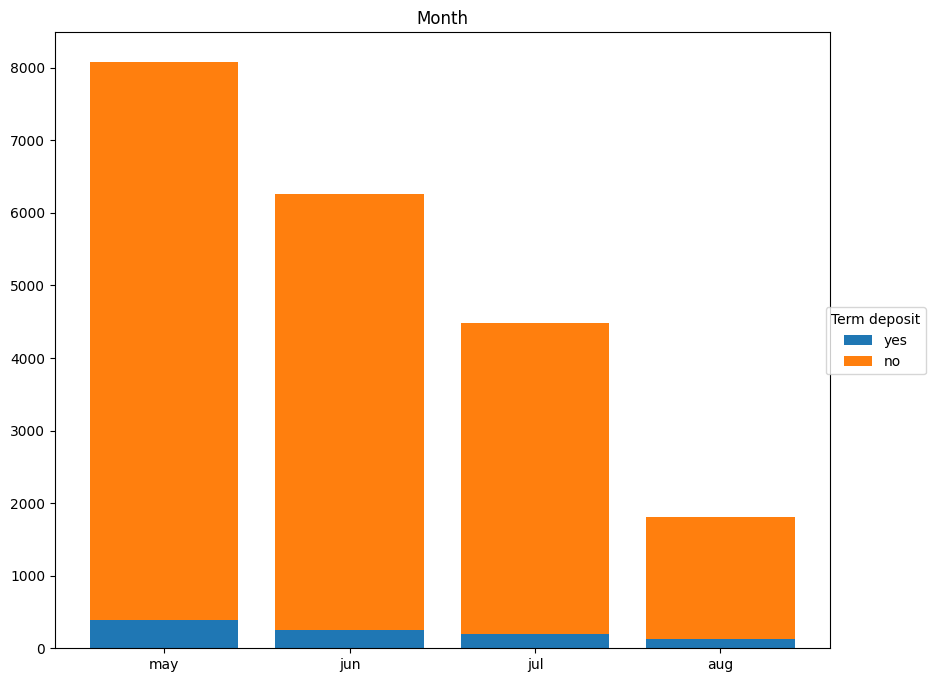

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))
ax.bar(d1['month'].unique(), height=d1['month'].value_counts())
ax.bar(d2["month"].unique(),height=d2["month"].value_counts(),bottom=d1["month"].value_counts())
ax.title.set_text('Month')
plt.figlegend(('yes','no'),loc='right',title='Term deposit')
plt.show()

In [ ]:
bank['y'].value_counts()

no     19654
yes      977
Name: y, dtype: int64

In [ ]:
# one-hot encoding of catogerical variables
bank1 = pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,1,0,0,0,1,0,0,0,1,1
1,44,no,29,yes,no,5,may,151,1,-1,...,0,1,0,1,0,0,0,0,1,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,1,0,0,0,0,1,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,1,0,0,0,0,1,0,0,1,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,54,no,1173,no,no,12,aug,128,8,-1,...,1,0,1,0,0,0,0,1,0,1
20627,31,no,208,no,no,12,aug,1344,7,-1,...,0,1,0,0,1,0,1,0,0,1
20628,31,no,297,no,no,12,aug,127,1,-1,...,0,0,0,0,1,0,1,0,0,1
20629,46,no,2278,no,no,12,aug,218,5,-1,...,0,1,0,0,1,0,1,0,0,1


In [ ]:
pd.set_option('display.max.columns', None)  # to  see all the columns
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
1,44,0,29,1,0,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1
2,33,0,2,1,1,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
3,47,0,1506,1,0,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1
4,33,0,1,0,0,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,54,0,1173,0,0,12,aug,128,8,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
20627,31,0,208,0,0,12,aug,1344,7,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
20628,31,0,297,0,0,12,aug,127,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
20629,46,0,2278,0,0,12,aug,218,5,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1


In [ ]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  20631 non-null  int64 
 1   default              20631 non-null  int64 
 2   balance              20631 non-null  int64 
 3   housing              20631 non-null  int64 
 4   loan                 20631 non-null  int64 
 5   day                  20631 non-null  int64 
 6   month                20631 non-null  object
 7   duration             20631 non-null  int64 
 8   campaign             20631 non-null  int64 
 9   pdays                20631 non-null  int64 
 10  previous             20631 non-null  int64 
 11  y                    20631 non-null  object
 12  job_admin.           20631 non-null  int64 
 13  job_blue-collar      20631 non-null  int64 
 14  job_entrepreneur     20631 non-null  int64 
 15  job_housemaid        20631 non-null  int64 
 16  job_

In [ ]:
#custome binary encoding of binary ouput variables
bank1['y'] = np.where(bank1['y'].str.contains('yes'), 1, 0)
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,54,0,1173,0,0,12,aug,128,8,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
20627,31,0,208,0,0,12,aug,1344,7,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
20628,31,0,297,0,0,12,aug,127,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
20629,46,0,2278,0,0,12,aug,218,5,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1


In [ ]:
# convert month to numeric
bank1['month'].value_counts()

may    7957
jul    6380
jun    4486
aug    1808
Name: month, dtype: int64

In [ ]:
MONS = {'month':{'may':5,'jun':6,'jul':7,'aug':8}}

In [ ]:
bank2 = bank1.replace(MONS)

In [ ]:
bank2

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,54,0,1173,0,0,12,8,128,8,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
20627,31,0,208,0,0,12,8,1344,7,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
20628,31,0,297,0,0,12,8,127,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
20629,46,0,2278,0,0,12,8,218,5,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1


In [ ]:
bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  20631 non-null  int64
 1   default              20631 non-null  int64
 2   balance              20631 non-null  int64
 3   housing              20631 non-null  int64
 4   loan                 20631 non-null  int64
 5   day                  20631 non-null  int64
 6   month                20631 non-null  int64
 7   duration             20631 non-null  int64
 8   campaign             20631 non-null  int64
 9   pdays                20631 non-null  int64
 10  previous             20631 non-null  int64
 11  y                    20631 non-null  int64
 12  job_admin.           20631 non-null  int64
 13  job_blue-collar      20631 non-null  int64
 14  job_entrepreneur     20631 non-null  int64
 15  job_housemaid        20631 non-null  int64
 16  job_management       2

# Model bulding

In [ ]:
# dividing out data into input and output variabels
x = pd.concat([bank2.iloc[:,0:11],bank2.iloc[:,12:]],axis = 1)
y = bank2.iloc[:,11]

In [ ]:
# logistic regression model
classifier = LogisticRegression()
classifier.fit(x,y)  #create classifer for class LogisticRegression then use object to fit the model


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#predict for x dataset
y_pred = classifier.predict(x)
y_pred                   # y hat values for x

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_df = pd.DataFrame({'actual':y,
                          'predicted_prob': classifier.predict(x)})

In [ ]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
20626,0,0
20627,1,1
20628,0,0
20629,0,0


# Testing Model Accuracy

In [ ]:
#confusion matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[19446   208]
 [  668   309]]


In [ ]:
((19446+309)/(19446+208+668+309))*100  # calculating the model accuracy

95.75396248364112

# ROC curve

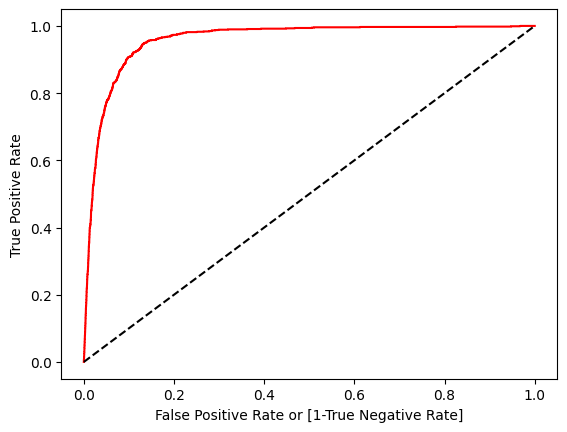

auc accuracy: 0.6528456108486437


In [ ]:
fpr, tpr,threshoulds = roc_curve(y,classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:' ,auc)